In [12]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd
from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from TDD2.TDD import get_unique_table_num as gu1
from TDD2.BDD import get_unique_table_num as gu2
import matplotlib.pyplot as plt

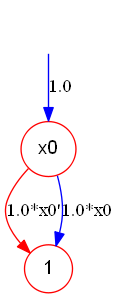

In [13]:
Ini_TDD(['x0','y0','x1','y1'])
A=['x0','y0','x1','y1','xn0','xn1']
[x0,y0,x1,y1,xn0,xn1]=symbols(A)
U=np.array([xn0,x0])
var=[Index('x0')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
tdd.show()
# ts2=Tensor(U,var)

<class 'TDD2.BDD.BDD'>


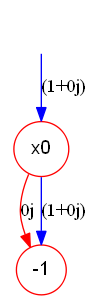

In [14]:
print(type(tdd.weight))
# tdd.weight.show()
tdd.node.out_weight[1].show()

Max nodes: 2


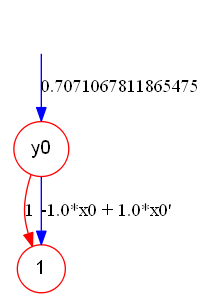

In [15]:
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
var2=[Index('x0'),Index('y0')]
ts2=Tensor(H,var2)
# ts2.tdd().show()
tn=TensorNetwork([ts1,ts2])
tdd=tn.cont()
# tdd.weight=[1/np.sqrt(2)]
tdd.show()
# Clear_TDD()

Max nodes: 4
0.10503363609313965
4
37
17


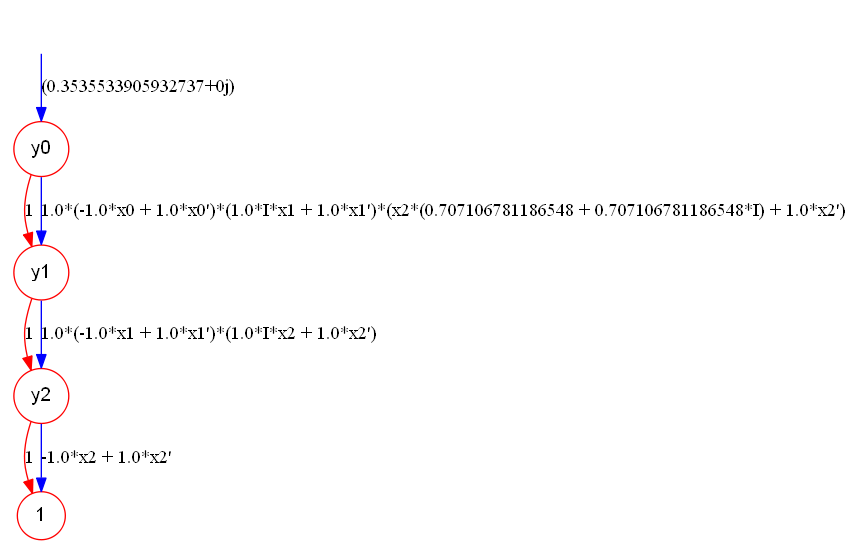

In [16]:
path='Benchmarks/'
n=3
t_start=time.time()
file_name='qft_'+str(n)+'.qasm'
cir=QuantumCircuit.from_qasm_file(path+file_name)
tn,indices=cir_2_tn(cir)
Ini_TDD(indices)
for k in range(n):
    x_k='x'+str(k)
    xn_k='xn'+str(k)
    s=Symbol(x_k)
    ns=Symbol(xn_k)
    U=np.array([ns,s])
#     U=np.array([1,0])
    temp_ts=Tensor(U,[Index(x_k)])
    tn.tensors.insert(0,temp_ts)
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.node_number())
print(gu1())
print(gu2())
tdd.show()

(0.7071067811865476+0.7071067811865476j)
<class 'complex'>


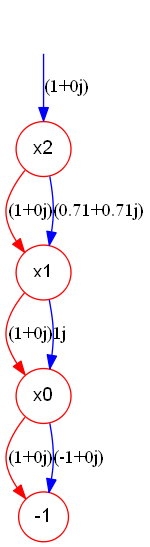

In [17]:
bdd=tdd.node.out_weight[1]
print(bdd.node.out_weight[1])
print(type(bdd.node.out_weight[1]))
bdd.show()

In [18]:
path='Benchmarks/'
x=[]
y=[]
z=[]
for n in range(2,31,1):
    t1=time.time()
    file_name='qft_'+str(n)+'.qasm'
    cir=QuantumCircuit.from_qasm_file(path+file_name)
    tn,indices=cir_2_tn(cir)
    for k in range(n):
        x_k='x'+str(k)
        xn_k='xn'+str(k)
        s=Symbol(x_k)
        ns=Symbol(xn_k)
        U=np.array([ns,s])
    #     U=np.array([1,0])
        temp_ts=Tensor(U,[Index(x_k)])
        tn.tensors.insert(0,temp_ts)
    Ini_TDD(indices)
    tdd=tn.cont()
    t=time.time()-t1
    print(n,t)
    print(gu1())
    print(gu2())
    x.append(n)
    y.append(t)
    z.append(gu1()+gu2())

Max nodes: 3
2 0.11098027229309082
20
9
Max nodes: 4
3 0.07599830627441406
37
17
Max nodes: 5
4 0.09505128860473633
60
29
Max nodes: 6
5 0.10795426368713379
88
46
Max nodes: 7
6 0.20505976676940918
122
69
Max nodes: 8
7 0.13494586944580078
163
99
Max nodes: 9
8 0.23999547958374023
212
137
Max nodes: 10
9 0.24601006507873535
270
184
Max nodes: 11
10 0.218003511428833
338
241
Max nodes: 12
11 0.35904455184936523
417
309
Max nodes: 13
12 0.24200129508972168
508
389
Max nodes: 14
13 0.30895209312438965
612
482
Max nodes: 15
14 0.4380662441253662
730
589
Max nodes: 16
15 0.37804746627807617
863
711
Max nodes: 17
16 0.529956579208374
1012
849
Max nodes: 18
17 0.548987865447998
1178
1004
Max nodes: 19
18 0.6511328220367432
1362
1177
Max nodes: 20
19 1.154999017715454
1565
1369
Max nodes: 21
20 0.9759988784790039
1788
1581
Max nodes: 22
21 1.397059440612793
2032
1814
Max nodes: 23
22 1.408937931060791
2298
2069
Max nodes: 24
23 1.0189998149871826
2586
2325
Max nodes: 25
24 1.1860096454620361
2

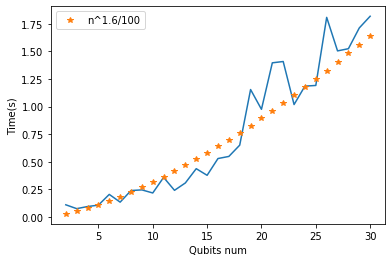

In [19]:
# y=[log(k) for k in y]
plt.plot(x,y)
k=[t**1.5/100 for t in x]
plt.plot(x,k,'*',label='n^1.6/100')
plt.xlabel("Qubits num")
plt.ylabel("Time(s)")
plt.legend()

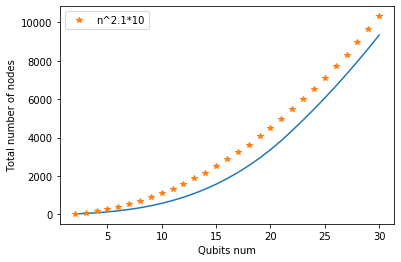

In [20]:
# z=[log(k) for k in z]
plt.plot(x,z)
k=[t**2.04*10 for t in x]
plt.plot(x,k,'*',label='n^2.1*10')
plt.xlabel("Qubits num")
plt.ylabel("Total number of nodes")
plt.legend()

10


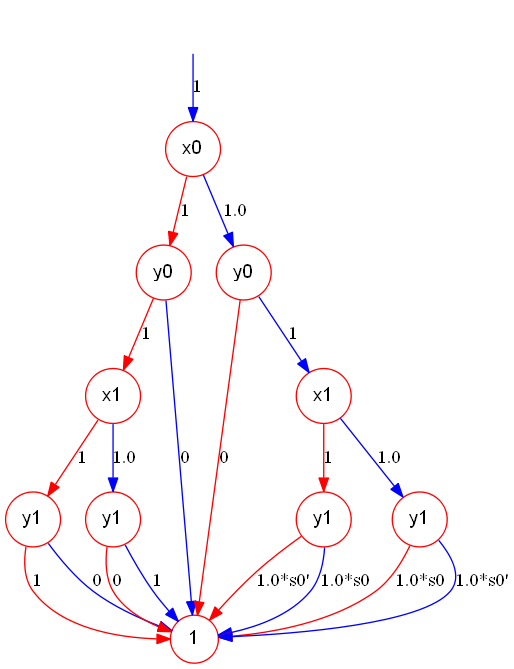

In [21]:
Ini_TDD(['x0','y0','x1','y1'],['s0'])
x=symbols('s0')
nx=symbols('sn0')
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,nx,x],[0,0,x,nx]])
# U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
# print(U)
var=[Index('x0'),Index('y0'),Index('x1'),Index('y1')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
print(tdd.node_number())
tdd.show()

Max nodes: 32
1266
91


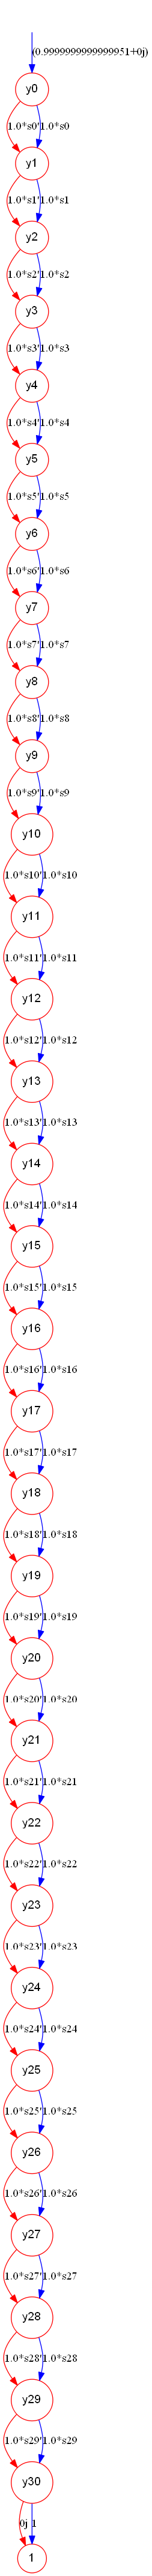

In [22]:
def veri_bv(n):

    syms=[]
    syms2=[]
    for k in range(n):
        syms.append(symbols('s'+str(k)))
        syms.append(symbols('sn'+str(k)))
        syms2.append('s'+str(k))
    tn=TensorNetwork([])
    U=np.array([1,0])
    for k in range(n):
        var=[Index('x'+str(k))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
        
    U=np.array([0,1])
    var=[Index('x'+str(n))]
    ts=Tensor(U,var)
    tn.tensors.append(ts)
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    for k in range(n+1):
        var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
        ts=Tensor(H,var)
        tn.tensors.append(ts)
    
    for k in range(n):
        U=np.array([[1,0,0,0],[0,1,0,0],[0,0,syms[2*k+1],syms[2*k]],[0,0,syms[2*k],syms[2*k+1]]])
        U=reshape2(U)
        var=[Index('x'+str(k)+'_1'),Index('x'+str(k)+'_2'),Index('x'+str(n)+'_'+str(k+1)),Index('x'+str(n)+'_'+str(k+2))]
        ts=Tensor(U,var)
        tn.tensors.append(ts)
    for k in range(n):
        var=[Index('x'+str(k)+'_2'),Index('y'+str(k))]
        ts=Tensor(H,var)
        tn.tensors.append(ts)

    var=[Index('x'+str(n)+'_'+str(n+1)),Index('y'+str(n))]
    ts=Tensor(H,var)
    tn.tensors.append(ts)
    
    var=[]
    for k in range(n):
        var.append('x'+str(k))
        var.append('x'+str(k)+'_1')
        var.append('x'+str(k)+'_2')
        var.append('y'+str(k))
    var.append('x'+str(n))
    
    for k in range(n+1):
        var.append('x'+str(n)+'_'+str(k+1))
    var.append('y'+str(n))
    syms2.reverse()
#     print(syms2)
    Ini_TDD(var,syms2)
    
    tdd=tn.cont()
    print(gu1())
    print(gu2())
    return tdd

tdd=veri_bv(30)
tdd.show()

In [23]:
def toffoli(n):
    """The matrix of C^n(X)"""
    T=np.eye(2**(n+1))
    T[2**(n+1)-2,2**(n+1)-2]=0
    T[2**(n+1)-1,2**(n+1)-1]=0
    T[2**(n+1)-2,2**(n+1)-1]=1
    T[2**(n+1)-1,2**(n+1)-2]=1
    return T

Max nodes: 9
152
278


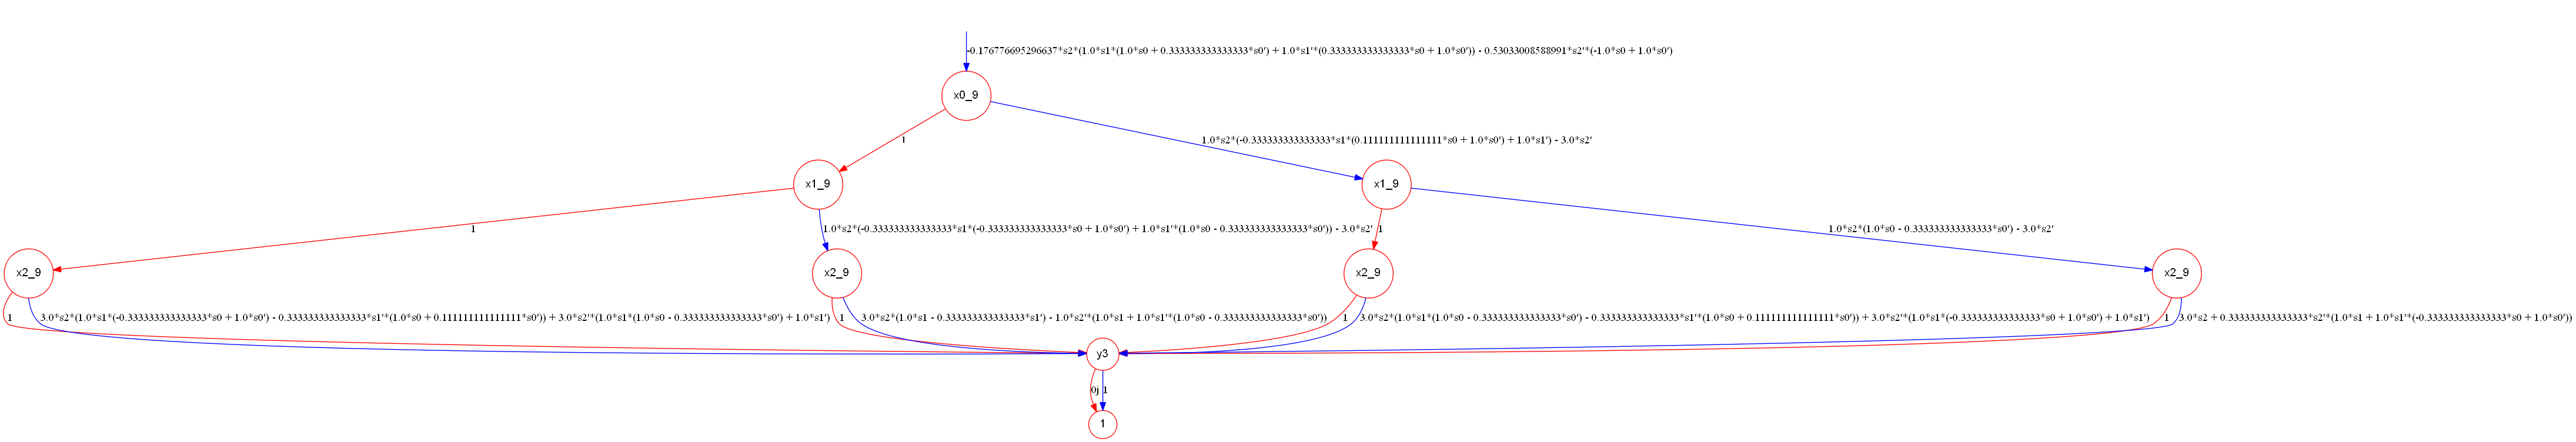

In [31]:
def veri_grover(n=2,r=1):
    U=toffoli(n)
    U=reshape2(U)
    U2=toffoli(n-1)
    U2=reshape2(U2)    
    syms=[]
    syms2=[]
    for k in range(n):
        syms.append(symbols('s'+str(k)))
        syms.append(symbols('sn'+str(k)))
        syms2.append('s'+str(k))
    
    H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
    X=np.array([[0,1],[1,0]])
    CX=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
    CX=reshape2(CX)
    
    tn=TensorNetwork([])

    #add initial
    k0=np.array([1,0])
    for k in range(n):
        var=[Index('x'+str(k))]
        ts=Tensor(k0,var)
        tn.tensors.append(ts)
        
    k1=np.array([0,1])    
    var=[Index('x'+str(n))]
    ts=Tensor(k1,var)
    tn.tensors.append(ts)
    
    #add H gate
    for k in range(n+1):
        var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
        ts=Tensor(H,var)
        tn.tensors.append(ts)
    
    
    for m in range(r):
        
        #add X^s gate
        for k in range(n):
            var=[Index('x'+str(k)+'_'+str(8*m+1)),Index('x'+str(k)+'_'+str(8*m+2))]
            Xs=np.array([[syms[2*k],syms[2*k+1]],[syms[2*k+1],syms[2*k]]])
            ts=Tensor(Xs,var)
            tn.tensors.append(ts)
        
        #add toffoli gate
        var=[]
        for k in range(n):
            var.append(Index('x'+str(k)+'_'+str(8*m+2)))
            var.append(Index('x'+str(k)+'_'+str(8*m+3)))
        var.append(Index('x'+str(n)+'_'+str(m+1)))
        var.append(Index('x'+str(n)+'_'+str(m+2)))
        ts=Tensor(U,var)
        tn.tensors.append(ts)
    
        #add X^s gate
        for k in range(n):
            var=[Index('x'+str(k)+'_'+str(8*m+3)),Index('x'+str(k)+'_'+str(8*m+4))]
            Xs=np.array([[syms[2*k],syms[2*k+1]],[syms[2*k+1],syms[2*k]]])
            ts=Tensor(Xs,var)
            tn.tensors.append(ts)
        
        #add H gate
        for k in range(n):
            var=[Index('x'+str(k)+'_'+str(8*m+4)),Index('x'+str(k)+'_'+str(8*m+5))]
            ts=Tensor(H,var)
            tn.tensors.append(ts)
        
        #add X gate
        for k in range(n-1):
            var=[Index('x'+str(k)+'_'+str(8*m+5)),Index('x'+str(k)+'_'+str(8*m+6))]
            ts=Tensor(X,var)
            tn.tensors.append(ts)        
    
        #add HX
        H1=1/np.sqrt(2)*np.array([[1,1],[-1,1]])
        var=[Index('x'+str(n-1)+'_'+str(8*m+5)),Index('x'+str(n-1)+'_'+str(8*m+6))]
        ts=Tensor(H1,var)
        tn.tensors.append(ts)    
#     var=[Index('x'+str(n-1)+'_5'),Index('x'+str(n-1)+'_13')]
#     ts=Tensor(X,var)
#     tn.tensors.append(ts)
#     var=[Index('x'+str(n-1)+'_13'),Index('x'+str(n-1)+'_6')]
#     ts=Tensor(H,var)
#     tn.tensors.append(ts)    

        #add Toffoli    
        var=[]
        for k in range(n):
            var.append(Index('x'+str(k)+'_'+str(8*m+6)))
            var.append(Index('x'+str(k)+'_'+str(8*m+7)))
        ts=Tensor(U2,var)
        tn.tensors.append(ts)
    
        #add X gate
        for k in range(n-1):
            var=[Index('x'+str(k)+'_'+str(8*m+7)),Index('x'+str(k)+'_'+str(8*m+8))]
            ts=Tensor(X,var)
            tn.tensors.append(ts)
        
        #add XH
        H2=1/np.sqrt(2)*np.array([[1,-1],[1,1]])
        var=[Index('x'+str(n-1)+'_'+str(8*m+7)),Index('x'+str(n-1)+'_'+str(8*m+8))]
        ts=Tensor(H2,var)
        tn.tensors.append(ts)
#     var=[Index('x'+str(n-1)+'_7'),Index('x'+str(n-1)+'_14')]
#     ts=Tensor(H,var)
#     tn.tensors.append(ts)
#     var=[Index('x'+str(n-1)+'_14'),Index('x'+str(n-1)+'_8')]
#     ts=Tensor(X,var)
#     tn.tensors.append(ts)    
    
        #add H gate
        for k in range(n):
            var=[Index('x'+str(k)+'_'+str(8*m+8)),Index('x'+str(k)+'_'+str(8*m+9))]
            ts=Tensor(H,var)
            tn.tensors.append(ts)
        
    var=[Index('x'+str(n)+'_'+str(r+1)),Index('y'+str(n))]
    ts=Tensor(H,var)
    tn.tensors.append(ts)
    
    var=[]
    for k in range(n+1):
        var.append('x'+str(k))
        for k1 in range(8*r+2):
            var.append('x'+str(k)+'_'+str(k1))
        var.append('y'+str(k))
    syms2.reverse()
#     print(syms2)
    Ini_TDD(var,syms2)

    
    tdd=tn.cont()
    print(gu1())
    print(gu2())
    return tdd

tdd=veri_grover(3,1)
tdd.show()

Max nodes: 5
59
14


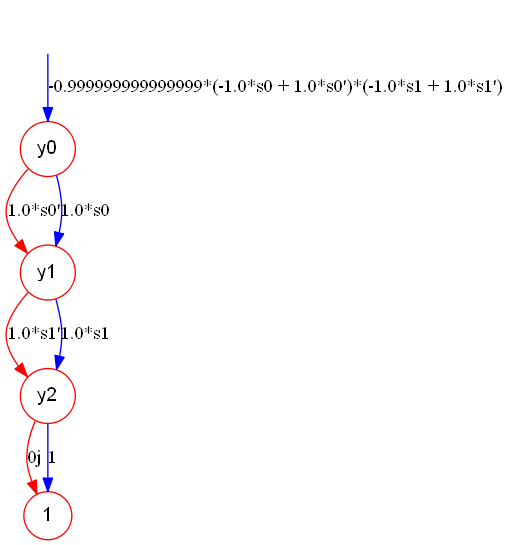

In [25]:
n=2
U=toffoli(n)
U=reshape2(U)
s0=symbols('s0')
s1=symbols('s1')
sn0=symbols('sn0')
sn1=symbols('sn1')
X0=np.array([[s0,sn0],[sn0,s0]])
X1=np.array([[s1,sn1],[sn1,s1]])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
X=np.array([[0,1],[1,0]])
CX=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CX=reshape2(CX)

tn=TensorNetwork([])

#add initial
k0=np.array([1,0])
for k in range(n):
    var=[Index('x'+str(k))]
    ts=Tensor(k0,var)
    tn.tensors.append(ts)
    
k1=np.array([0,1])    
var=[Index('x'+str(n))]
ts=Tensor(k1,var)
tn.tensors.append(ts)

#add H gate
for k in range(n+1):
    var=[Index('x'+str(k)),Index('x'+str(k)+'_1')]
    ts=Tensor(H,var)
    tn.tensors.append(ts)

#add X^s gate
var=[Index('x0_1'),Index('x0_2')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_1'),Index('x1_2')]
ts=Tensor(X1,var)
tn.tensors.append(ts)

#add toffoli gate
var=[]
for k in range(n):
    var.append(Index('x'+str(k)+'_2'))
    var.append(Index('x'+str(k)+'_3'))
var.append(Index('x'+str(n)+'_1'))
var.append(Index('x'+str(n)+'_2'))
ts=Tensor(U,var)
tn.tensors.append(ts)

#add X^s gate
var=[Index('x0_3'),Index('x0_4')]
ts=Tensor(X0,var)
tn.tensors.append(ts)
var=[Index('x1_3'),Index('x1_4')]
ts=Tensor(X1,var)
tn.tensors.append(ts)


#add H gate
for k in range(n):
    var=[Index('x'+str(k)+'_4'),Index('x'+str(k)+'_5')]
    ts=Tensor(H,var)
    tn.tensors.append(ts)

#add X gate
for k in range(n):
    var=[Index('x'+str(k)+'_5'),Index('x'+str(k)+'_6')]
    ts=Tensor(X,var)
    tn.tensors.append(ts)
    
var=[Index('x1_6'),Index('x1_7')]
ts=Tensor(H,var)
tn.tensors.append(ts)    
    
var=[Index('x0_6'),Index('x0_7'),Index('x1_7'),Index('x1_8')]
ts=Tensor(CX,var)
tn.tensors.append(ts)  

var=[Index('x1_8'),Index('x1_9')]
ts=Tensor(H,var)
tn.tensors.append(ts) 
    
var=[Index('x0_7'),Index('x0_8')]
ts=Tensor(X,var)
tn.tensors.append(ts)     

var=[Index('x1_9'),Index('x1_10')]
ts=Tensor(X,var)
tn.tensors.append(ts)

var=[Index('x0_8'),Index('y0')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[Index('x1_10'),Index('y1')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[Index('x2_2'),Index('y2')]
ts=Tensor(H,var)
tn.tensors.append(ts) 

var=[]
for k in range(n+1):
    var.append('x'+str(k))
    for k1 in range(11):
        var.append('x'+str(k)+'_'+str(k1))
    var.append('y'+str(k))
    
Ini_TDD(var,['s1','s0'])
    
tdd=tn.cont()
print(gu1())
print(gu2())
tdd.show()

In [26]:
# Ini_TDD(['x0','y0','x1','y1'],['s0'])
# A=['x0','y0','x1','y1','xn0','xn1']
# [s0,sn0]=symbols(['s0','sn0'])
# X=np.array([[sn0,s0],[s0,sn0]])
# var2=[Index('x0'),Index('y0')]
# ts2=Tensor(X,var2)
# # ts2.tdd().show()
# tdd=ts2.tdd()
# tdd.show()
# # ts2=Tensor(U,var)